# Students' grade predictor

### Project legend

- Introduction and Data Description
- Missing Values
- Explorary Data Analysis
- Variable Selection and Transformation
- Training/test data division
- Rabdom Forest Regression
- Gradient Boosting Regression
- XGBOOST
- Conclusions

## Introduction

My dataset were obtained in a survey of students math and portuguese language courses in secondary school in Portugues. It contains a lot of interesting social, gender and study information about students.

In this project  I am going to try to predict grades of Portuguese students for a math course in 2008. The dependant variable is G3 which is a numeric value from 0 to 20. As you will see further, this dataset does not contain any missing values.

I used 3 methods:

- Random Forest Regression
- Gradient Boosting (GBM)
- XGBOOST

## Data Description

The data set contains the following input variables:

**school** : student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

**sex** : student's sex (binary: 'F' - female or 'M' - male)

**age** : student's age (numeric: from 15 to 22)

**address** : student's home address type (binary: 'U' - urban or 'R' - rural)

**famsize** : family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

**Pstatus** : parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

**Medu** : mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

**Fedu** : father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

**Mjob** : mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

**Fjob** : father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

**reason** : reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

**guardian** : student's guardian (nominal: 'mother', 'father' or 'other')

**traveltime** : home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

**studytime** : weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

**failures** : number of past class failures (numeric: n if 1<=n<3, else 4)

**schoolsup** : extra educational support (binary: yes or no)

**famsup** : family educational support (binary: yes or no)

**paid** : extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

**activities** : extra-curricular activities (binary: yes or no)

**nursery** : attended nursery school (binary: yes or no)

**higher** : wants to take higher education (binary: yes or no)

**internet** : Internet access at home (binary: yes or no)

**romantic** : with a romantic relationship (binary: yes or no)

**famrel** : quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

**freetime** : free time after school (numeric: from 1 - very low to 5 - very high)

**goout** : going out with friends (numeric: from 1 - very low to 5 - very high)

**Dalc** : workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

**Walc** : weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

**health** : current health status (numeric: from 1 - very bad to 5 - very good)

**absences** : number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math or Portuguese:

**G1** : first period grade (numeric: from 0 to 20)

**G2** : second period grade (numeric: from 0 to 20)

**G3** : final grade (numeric: from 0 to 20, output target)

<p>

First of all, load to memory all necessary packages.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import gc
import warnings
import math
plt.style.use('seaborn-ticks')
%matplotlib inline
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import resample
from sklearn.metrics import mean_absolute_error

warnings.filterwarnings('ignore')

The dataset was taken from publicly available source Kaggle. Which can be found under following link: https://www.kaggle.com/uciml/student-alcohol-consumption

I gonna import the excel files into the notebook. The dataset consists of students math and portuguese language courses set. So I shall first combine the 2 datasets into a single one so as not to apply all changes to both of them.

In [2]:
st_m = pd.read_csv("student-mat.csv")
st_p = pd.read_csv("student-por.csv")


df = pd.concat([st_m, st_p])

df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


The structer of dataset.

In [3]:
df.shape

(1044, 33)

Let's look of the type of the data.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher   

Calculating some statistics for data.

In [5]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


<p>

## Missing Values

Cheking missing values in each column.

In [6]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

So we can see that data doesn't contain missing values.

<p>

## Explorary Data Analysis

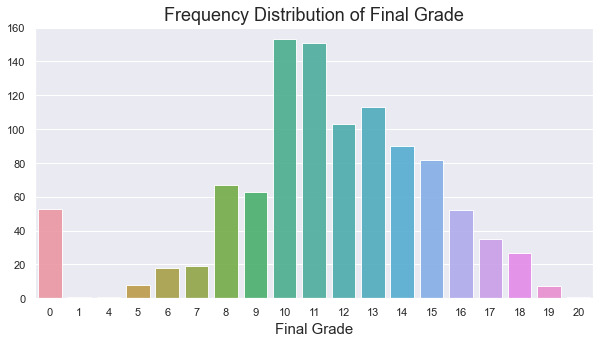

In [7]:
%matplotlib inline
count = df["G3"].value_counts()
sns.set(style="darkgrid")
plt.figure(figsize=(10,5))
plots = sns.barplot(count.index, count.values, alpha=0.9)
plt.title('Frequency Distribution of Final Grade', fontsize = 18)
plt.xlabel('Final Grade', fontsize = 15)
plt.show()

It can be noticed that observations are well distributed around the average, but there is a large proportion of 0, which is rather curious.

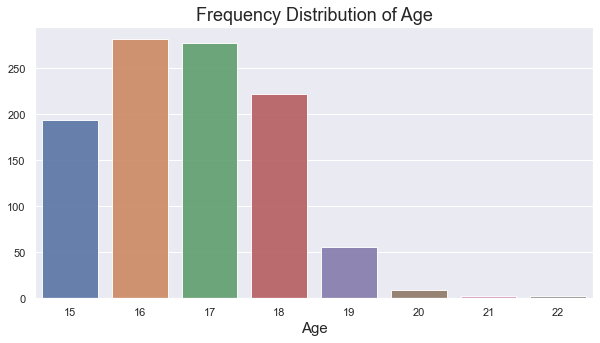

In [8]:
%matplotlib inline
count = df["age"].value_counts()
sns.set(style="darkgrid")
plt.figure(figsize=(10,5))
plots = sns.barplot(count.index, count.values, alpha=0.9)
plt.title('Frequency Distribution of Age', fontsize = 18)
plt.xlabel('Age', fontsize = 15)
plt.show()

Students are mostly between 15 and 18 which seems coherent as people should attend secondary school until 18.

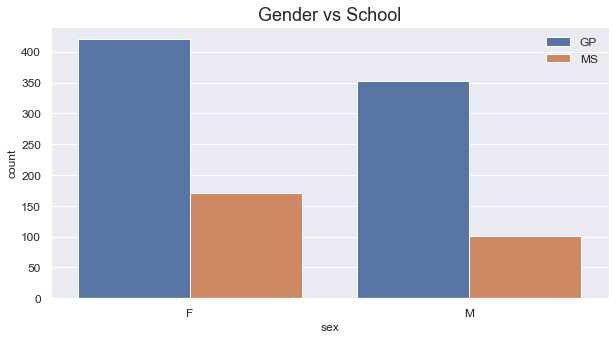

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(df['sex'], hue = df['school'])
plt.title('Gender vs School', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

The distribution between schools is clearly disproportionate but we can also see that genders are almost evenly distributed.

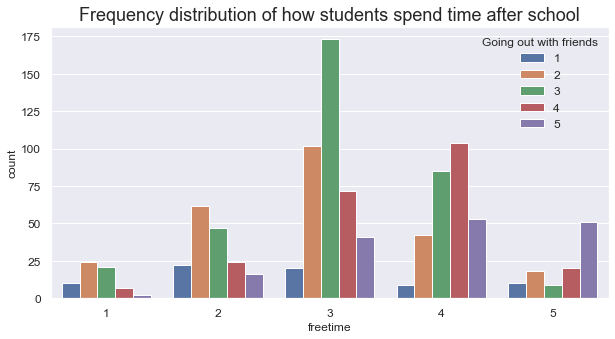

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(df['freetime'], hue = df['goout'])
plt.title('Frequency distribution of how students spend time after school', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title= "Going out with friends", fontsize=12)

Both freetime and frequency of going out are normally distributed around average and tend to evolve the same way. More freetime often means a bigger frequency of going out.

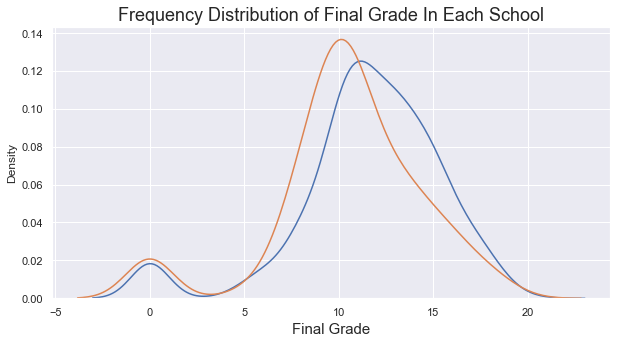

In [11]:
GP = df[df.school == 'GP']
MS = df[df.school == 'MS']
plt.figure(figsize=(10,5))
sns.distplot(GP.G3, hist=False, label="GP")
sns.distplot(MS.G3, hist=False, label="MS")
plt.title('Frequency Distribution of Final Grade In Each School', fontsize = 18)
plt.xlabel('Final Grade', fontsize = 15)
plt.show()

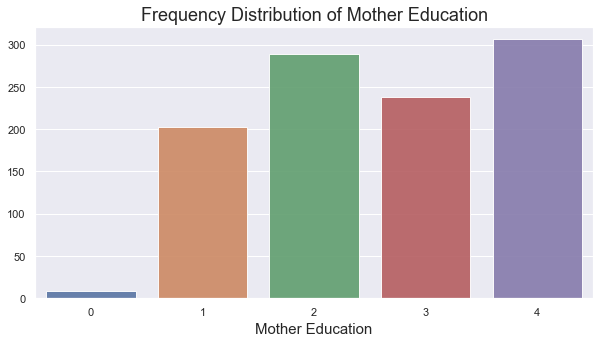

In [12]:
%matplotlib inline
count = df["Medu"].value_counts()
sns.set(style="darkgrid")
plt.figure(figsize=(10,5))
plots = sns.barplot(count.index, count.values, alpha=0.9)
plt.title('Frequency Distribution of Mother Education', fontsize = 18)
plt.xlabel('Mother Education', fontsize = 15)
plt.show()

We can see than most mothers have higher education and  2 – 5th to 9th grad.

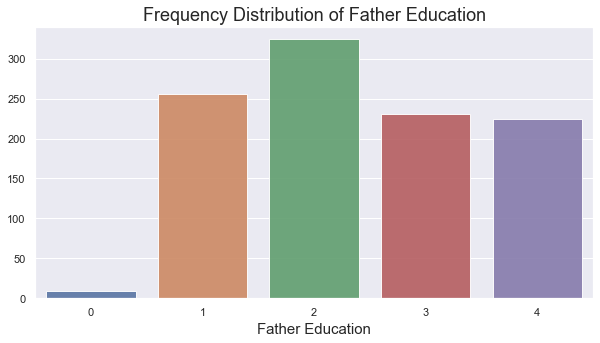

In [13]:
%matplotlib inline
count = df["Fedu"].value_counts()
sns.set(style="darkgrid")
plt.figure(figsize=(10,5))
plots = sns.barplot(count.index, count.values, alpha=0.9)
plt.title('Frequency Distribution of Father Education', fontsize = 18)
plt.xlabel('Father Education', fontsize = 15)
plt.show()

We can see than most fathers have 2 – 5th to 9th grad.

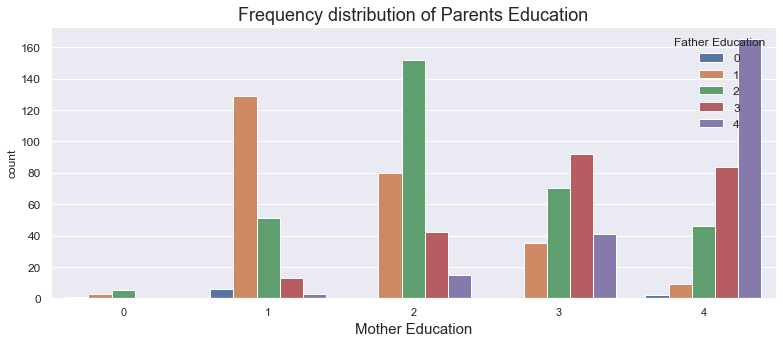

In [14]:
plt.figure(figsize=(13,5))
sns.countplot(df['Medu'], hue = df['Fedu'])
plt.title('Frequency distribution of Parents Education', fontsize=18)
plt.xlabel('Mother Education', fontsize = 15)
plt.yticks(fontsize=12)
plt.legend(title= "Father Education", fontsize=12)
plt.show()

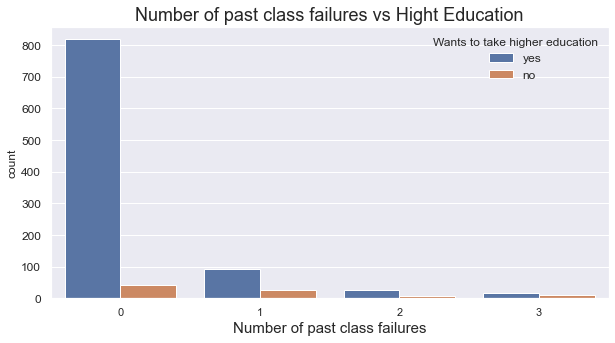

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(df['failures'], hue = df['higher'])
plt.title('Number of past class failures vs Hight Education', fontsize=18)
plt.xlabel('Number of past class failures', fontsize = 15)
plt.yticks(fontsize=12)
plt.legend(title= "Wants to take higher education", fontsize=12)
plt.show()

This plot shows that students who never faced failures tend to be much more motivated to take higher education.

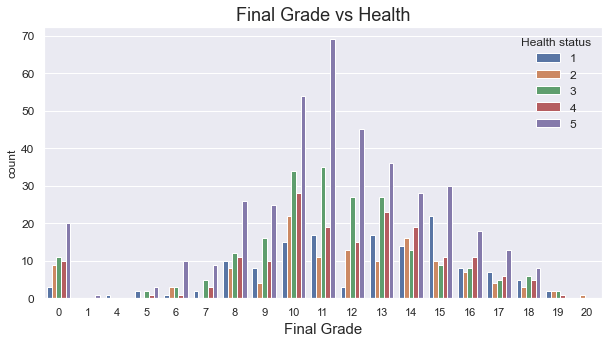

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(df['G3'], hue = df['health'])
plt.title('Final Grade vs Health', fontsize=18)
plt.xlabel('Final Grade', fontsize = 15)
plt.yticks(fontsize=12)
plt.legend(title= "Health status", fontsize=12, loc='upper right')
plt.show()

As we can see from the graph, students with good health have higher grades.

<p>

## Variable Selection and Transformation

**Correlation Matrix**

Now let's check the correlation between variables.

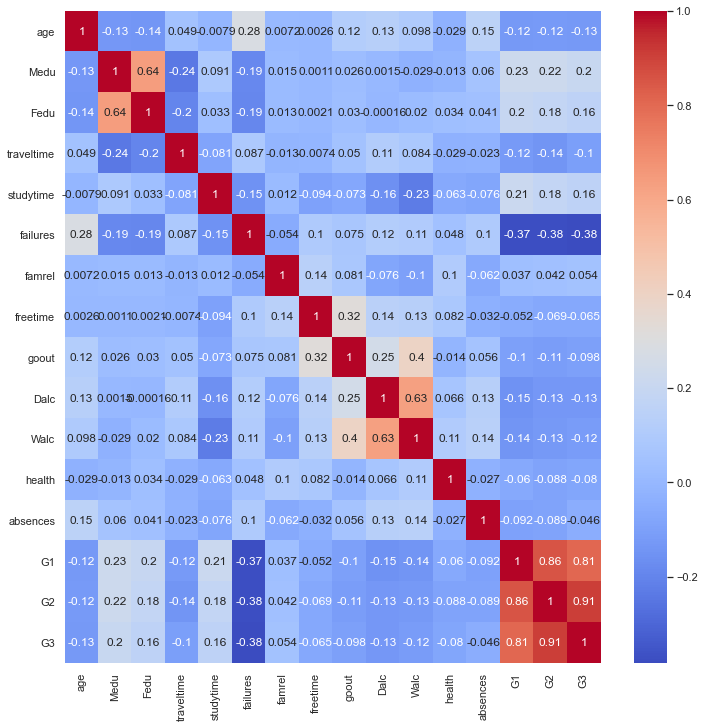

In [17]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

In the correlation map, we can see that there is a high positive correlation between **Mother education** and **Father education**, and between **workdays** and **weekend alcohol consumption**. And we can say that **going out** and **weekend alcohol consumption** have moderate positive correlation.

Also we can see very hight positive correlation between **Final Grade** and  **First Period Grade** and **Second Period Grade**.

I will choose to drop G1 and G2, Medu and Dalc as they are more correlated with our target variable G3 than their pairs.

In [ ]:
df = df.drop(['G1', 'G2', 'Medu', 'Dalc'], axis=1)

In [ ]:
df.dtypes

<p>

## Divide dataset into training and testing sample

First, I convert categorical data into dummy variables with **get_dummies()** function.

In [129]:
df = pd.get_dummies(data=df, columns=['school','sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason',
                                      'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
                                      'internet', 'romantic'])

In [130]:
df.dtypes

age                  int64
Fedu                 int64
traveltime           int64
studytime            int64
failures             int64
famrel               int64
freetime             int64
goout                int64
Walc                 int64
health               int64
absences             int64
G3                   int64
school_GP            uint8
school_MS            uint8
sex_F                uint8
sex_M                uint8
address_R            uint8
address_U            uint8
famsize_GT3          uint8
famsize_LE3          uint8
Pstatus_A            uint8
Pstatus_T            uint8
Mjob_at_home         uint8
Mjob_health          uint8
Mjob_other           uint8
Mjob_services        uint8
Mjob_teacher         uint8
Fjob_at_home         uint8
Fjob_health          uint8
Fjob_other           uint8
Fjob_services        uint8
Fjob_teacher         uint8
reason_course        uint8
reason_home          uint8
reason_other         uint8
reason_reputation    uint8
guardian_father      uint8
g

Then I separate the columns into dependent and independent variables. And then split those variables into a training and test set.

In [227]:
X = df.drop('G3', axis=1) #Features

y = df['G3'] 

In [228]:
#70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((730, 54), (314, 54), (730,), (314,))

<p>

## Random Forests Regressor

First, I set up the hyperparameters using GridSearchCV. 

In [133]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [134]:
params = {'max_depth' : [4, 6, 8, 10, 16, 18, 23],
          'n_estimators': [50, 100, 130, 150, 200, 250],
          'max_samples': [1, 0.8, 0.6, 0.4, 0.3],
          'min_samples_split': [2, 4, 6, 8, 10]
         }

rf = RandomForestRegressor()

model_params = GridSearchCV(estimator = rf,
                           param_grid = params,
                           verbose = 2,
                           cv = 3,
                           scoring='neg_mean_squared_error',
                           n_jobs = -1)

In [135]:
model_params.fit(X_train, y_train)

Fitting 3 folds for each of 1050 candidates, totalling 3150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 3150 out of 3150 | elapsed:  7.7min finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8, 10, 16, 18, 23],
                         'max_samples': [1, 0.8, 0.6, 0.4, 0.3],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [50, 100, 130, 150, 200, 250]},
             scoring='neg_mean_squared_error', verbose=2)

**The best parameters**

In [136]:
print ('Best Parameters: ', model_params.best_params_, ' \n')
#Best Parameters:  {'max_depth': 16, 'max_samples': 0.6, 'min_samples_split': 4, 'n_estimators': 100}

Best Parameters:  {'max_depth': 16, 'max_samples': 0.6, 'min_samples_split': 4, 'n_estimators': 100}  



Now, building the random forest model.

In [229]:
#instantiate the regressor with the best parameters
model_rf = RandomForestClassifier(n_estimators = 100,
                                  min_samples_split = 4,
                                  max_depth = 16, 
                                  max_samples = 0.6)

#fit the model to the training set
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=16, max_samples=0.6, min_samples_split=4)

**Evaluate the random forest regression model**

<p>

In [233]:
#pridict out model
predict_rf = model_rf.predict(X_test)

**Absolute error**

In [314]:
mae_rf = metrics.mean_absolute_error(y_test, predict_rf)

print('Mean Absolute Error:', mae_rf)

Mean Absolute Error: 2.7643312101910826


**Mean Squared Error**

In [315]:
mse_rf = metrics.mean_squared_error(y_test, predict_rf)

print('Mean Squared Error:', mse_rf)

Mean Squared Error: 16.713375796178344


**Root Mean Squared Error**

In [316]:
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, predict_rf))

print('Root Mean Squared Error:', rmse_rf)

Root Mean Squared Error: 4.088199578809521


**Plot of Actual vs Predicted Data**

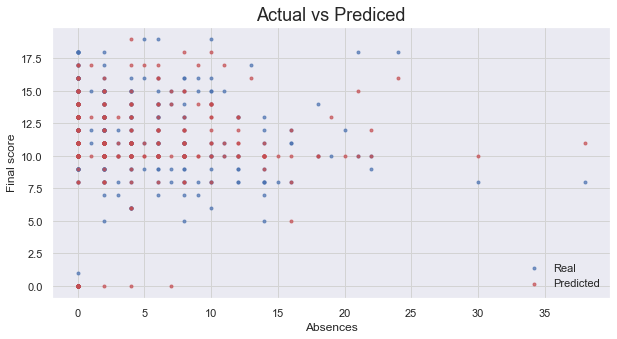

In [303]:
# Define x axis
x_axis = X_test.absences

# Build scatterplot
plt.figure(figsize=(10,5))
plt.scatter(x_axis, y_test, c = 'b', alpha = 0.7, marker = '.', label = 'Real')
plt.scatter(x_axis, predict_rf, c = 'r', alpha = 0.7, marker = '.', label = 'Predicted')
plt.title('Actual vs Prediced', fontsize=18)
plt.xlabel('Absences')
plt.ylabel('Final score')
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'lower right')
plt.show()

Looking at the graph, you can see that the values are quite far from each other.

**Feature Importance**

Also using Random Forest Regressor we can choose the most important features.

In [278]:
# Get features list
characteristics = X.columns

# Get the variables importances, sort them, and print the result
importances = list(model_rf.feature_importances_)
characteristics_importances = [(characteristic, round(importance, 4)) for characteristic, importance in zip(characteristics, importances)]
characteristics_importances = sorted(characteristics_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in characteristics_importances];

Variable: absences             Importance: 0.065
Variable: goout                Importance: 0.0461
Variable: age                  Importance: 0.0457
Variable: freetime             Importance: 0.0429
Variable: Fedu                 Importance: 0.0428
Variable: health               Importance: 0.0428
Variable: Walc                 Importance: 0.0397
Variable: famrel               Importance: 0.0352
Variable: studytime            Importance: 0.0328
Variable: traveltime           Importance: 0.0269
Variable: failures             Importance: 0.0265
Variable: reason_course        Importance: 0.0188
Variable: paid_no              Importance: 0.0178
Variable: Fjob_services        Importance: 0.0173
Variable: romantic_no          Importance: 0.0165
Variable: famsup_no            Importance: 0.0162
Variable: paid_yes             Importance: 0.0162
Variable: Mjob_other           Importance: 0.016
Variable: famsup_yes           Importance: 0.0159
Variable: activities_yes       Importance: 0.0157
Va

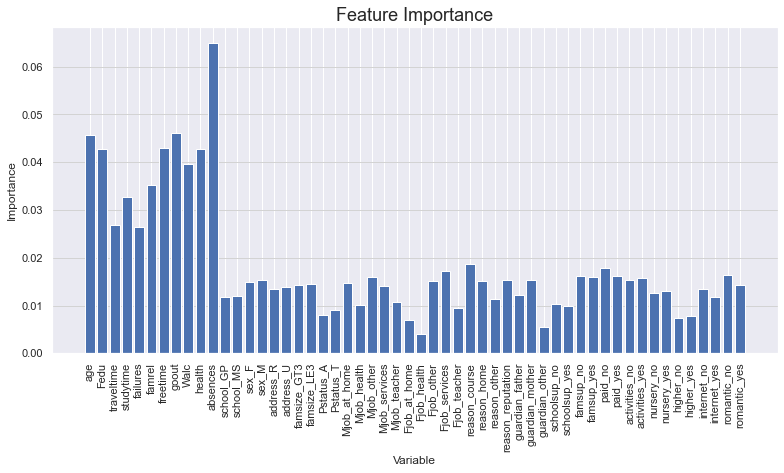

In [298]:
# Visualize the variables importances
plt.figure(figsize=(13,6))
sns.set(style="darkgrid")
plt.bar(characteristics, importances, orientation = 'vertical')
plt.xticks(rotation = 'vertical')
plt.title('Feature Importance', fontsize=18)
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.grid(axis = 'y', color = '#D3D3D3', linestyle = 'solid')
plt.show()

It can be noteced that the most important variables are **Number of school absences**, **Going out with friends** and **Age** and the less important - **Fjob_health**.

## Gradient Boosting (GBM)

In [240]:
from sklearn.ensemble import GradientBoostingRegressor

Make the list of all possibilities for each of the Hyperparameters.

In [139]:
gbm_params = {'learning_rate':[0.15, 0.1, 0.05, 1],
           'n_estimators':[50, 100, 130, 150, 200],
           'max_depth':[2, 3, 5, 6, 7],
           'min_samples_split': [2, 4, 6, 8, 10]}

gbm = GradientBoostingRegressor()

gbm_model_params = GridSearchCV(estimator = gbm,
                           param_grid = gbm_params,
                           verbose = 2,
                           cv = 5,
                           n_jobs = -1)

In [140]:
gbm_model_params.fit(X_train, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:  2.5min finished


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.15, 0.1, 0.05, 1],
                         'max_depth': [2, 3, 5, 6, 7],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [50, 100, 130, 150, 200]},
             verbose=2)

**The best parameters**

In [141]:
print ('Best Parameters: ', gbm_model_params.best_params_, ' \n')
#Best Parameters:  {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_split': 8, 'n_estimators': 200}

Best Parameters:  {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_split': 8, 'n_estimators': 200}  



So let's will build the Gradient Boosting Model.

In [241]:
model_gbm = GradientBoostingRegressor(learning_rate = 0.05,
                                      max_depth = 3,
                                      min_samples_split = 8,
                                      n_estimators = 200)

#fit the model to the training set
model_gbm.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, min_samples_split=8,
                          n_estimators=200)

**Prediction**

In [263]:
#predict on the test set results
predict_model_gbm = model_gbm.predict(X_test)

**Absolute error**

In [318]:
#Mean Absolute Error
mae_gbm = metrics.mean_absolute_error(y_test, predict_model_gbm)

print('Mean Absolute Error(MAE) - GBM: ', mae_gbm)

Mean Absolute Error(MAE) - GBM:  2.5107668239202123


**Mean Squared Error**

In [312]:
mse_gbm = metrics.mean_squared_error(y_test, predict_model_gbm)

print('Mean Squared Error - GBM:', mse_gbm)

Mean Squared Error - GBM: 12.125116937354424


**Root Mean Squared Error**

In [313]:
rmse_gbm = np.sqrt(metrics.mean_squared_error(y_test, predict_model_gbm))

print('Root Mean Squared Error:', rmse_gbm)

Root Mean Squared Error: 3.482113860481076


**Plot of Actual vs Predicted Data**

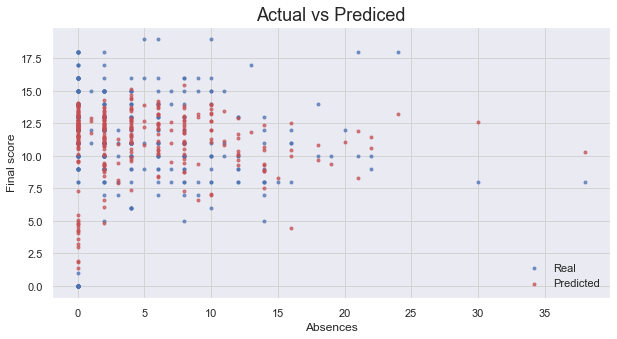

In [305]:
# Define x axis
x_axis = X_test.absences

# Build scatterplot
plt.figure(figsize=(10,5))
plt.scatter(x_axis, y_test, c = 'b', alpha = 0.7, marker = '.', label = 'Real')
plt.scatter(x_axis, predict_model_gbm, c = 'r', alpha = 0.7, marker = '.', label = 'Predicted')
plt.title('Actual vs Prediced', fontsize=18)
plt.xlabel('Absences')
plt.ylabel('Final score')
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'lower right')
plt.show()

Compared with the graph of the random forest, you can see here closer to themselves the actual and predicted values.

## XGBOOST

In [256]:
from xgboost import XGBRegressor
from xgboost import XGBRFRegressor

First of all I will make the list of all possibilities for each of the Hyperparameters.

In [259]:
param_grid_xgb = {
    'max_depth': [2, 4, 7],
    'learning_rate': [0.4, 0.3, 0.1, 0.05],
    'min_child_weight': [0, 10, 1],
    'colsample_bytree': [0.5, 0.7, 1],
    'n_estimators' : [50, 100, 130, 150, 200]
    }


xgb = XGBRegressor()

optimal_params_xgb = GridSearchCV(estimator = xgb,
                                  param_grid = param_grid_xgb,
                                  verbose = 2,
                                  cv = 5,
                                  n_jobs = -1
                                )

In [261]:
optimal_params_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed:  4.7min finished


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                 

**The best parameters**

In [262]:
print ('Best Parameters: ', optimal_params_xgb.best_params_, ' \n')
#Best Parameters:  {'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 0, 'n_estimators': 100} 

Best Parameters:  {'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 0, 'n_estimators': 100}  



So let's build the XGBOOST Model.

In [266]:
model_xgb = XGBRegressor(objective = 'reg:squarederror',
                         learning_rate = 0.05,
                         max_depth = 4,
                         min_child_weight = 0,
                         n_estimators = 100)

#fit the model to the training set
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=4, min_child_weight=0, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

**Prediction**

In [267]:
#predict on the test set results
predict_model_xgb = model_xgb.predict(X_test)

**Absolute error**

In [309]:
#Mean Absolute Error
mae_xgb = metrics.mean_absolute_error(y_test, predict_model_xgb)

print('Mean Absolute Error(MAE) - XGBOOST: ', mae_xgb)

Mean Absolute Error(MAE) - XGBOOST:  2.445626451521163


**Mean Squared Error**

In [310]:
mse_xgb = metrics.mean_squared_error(y_test, predict_model_xgb)

print('Mean Squared Error - XGBOOST:', mse_xgb)

Mean Squared Error - XGBOOST: 11.646259262409398


**Root Mean Squared Error**

In [311]:
rmse_xgb = np.sqrt(metrics.mean_squared_error(y_test, predict_model_xgb))

print('Root Mean Squared Error - XGBOOST:', rmse_xgb)

Root Mean Squared Error - XGBOOST: 3.4126616097130693


**Plot of Actual vs Predicted Data**

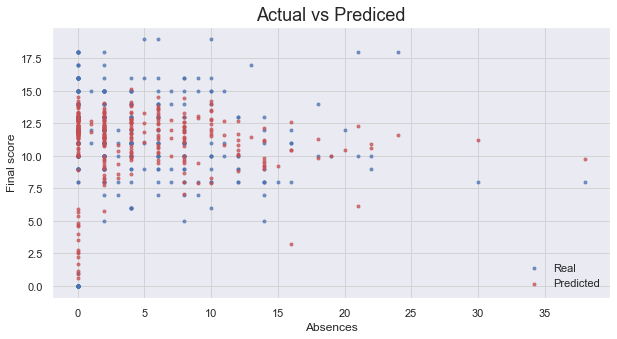

In [304]:
# Define x axis
x_axis = X_test.absences

# Build scatterplot
plt.figure(figsize=(10,5))
plt.scatter(x_axis, y_test, c = 'b', alpha = 0.7, marker = '.', label = 'Real')
plt.scatter(x_axis, predict_model_xgb, c = 'r', alpha = 0.7, marker = '.', label = 'Predicted')
plt.title('Actual vs Prediced', fontsize=18)
plt.xlabel('Absences')
plt.ylabel('Final score')
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'lower right')
plt.show()

As can be seen from this figure, the predicted scores (red scatter) match the real scores (blue scatter) much better, especially in the area of small absence values.

## Summary and Conclution

In [319]:
# make a dictionary with all the results
results = {
           'Model': ['Random Forest','Gradient Boosting','XGBoost'],
           'MAE' : [mae_rf, mae_gbm, mae_xgb],
           'MSE': [mse_rf, mse_gbm, mse_xgb],
           'RMSPE': [rmse_rf, rmse_gbm, rmse_xgb]
          }

results_df = pd.DataFrame.from_dict(results)

display(results_df)

,Model,MAE,MSE,RMSPE
0,Random Forest,2.764331,16.713376,4.088200
1,Gradient Boosting,2.510767,12.125117,3.482114
2,XGBoost,2.445626,11.646259,3.412662


Looking at **MAE**, **MSE** and **RMSPE** values and comparing each other I can say that the best model is **XGBoost** so it has the lowest values.